# Przekształcenia punktowe

W trakcie niniejszego ćwiczenia zapoznamy się z podstawowymi operacjami punktowymi (bezkontekstowymi) przeprowadzanymi na obrazach cyfrowych:
- typu LUT (operacja jednoargumentowa),
- arytmetycznymi (operacje dwuargumentowe): dodawanie, odejmowanie, mnożenie, dzielenie,
- logicznymi (operacje jedno i dwuargumentowe): AND, OR, XOR, NOT.

Na początku zaimportuj potrzebne biblioteki.

In [2]:
import cv2
import os
import requests
import numpy as np
import matplotlib.pyplot as plt

## Operacja LUT

**Operacja LUT** polega na przekształcaniu wartości poszczególnych pikseli obrazu przy użyciu z góry przygotowanych tabel przekodowań (tabel korekcji).

W przetwarzaniu obrazów najczęściej wykorzystuje się następujące funkcje:
- typu kwadratowa, pierwiastek kwadratowy
- typu logarytm, odwrócony logarytm
- typu wykładnicza,
- inne (np. piłokształtna).

W tym zadaniu zostały dla Państwa przygotowane tablice przekodowania.
Proszę pobrać je z githuba `https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py` (można użyć znanej biblioteki request), a następnie zaimportować je poleceniem `import lut`.
Od tego momentu można się do nich odwoływać w następujący sposób: `lut.log` itd.

In [3]:
url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/'
fileName = 'lut.py'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

Wyświetl przykładowe przekodowanie wykorzystując funkcję `plt.plot(lut.kwadratowa)`.

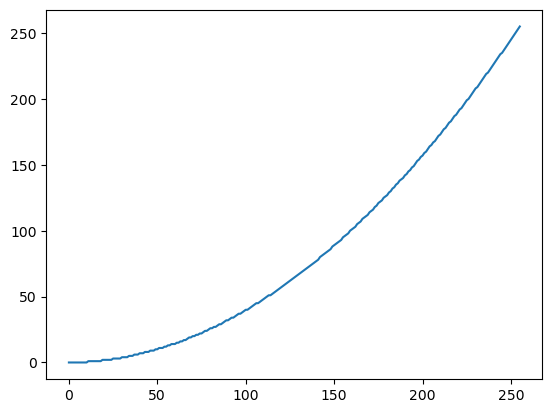

In [4]:
import lut
plt.plot(lut.kwadratowa)

Wybierz jeden z obrazów: _lena.bmp_ lub _jet.bmp_ (w razie potrzeby pobierz go z githuba):
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp

Wczytaj go i wyświetl.

In [5]:
fileName = 'lena.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

fileName = 'jet.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

Na wybranym obrazie wykonaj operację LUT.
Służy do tego funkcja `cv2.LUT` przyjmująca dwa argumenty: obraz oraz tablicę przekodowania.
Wybierz dowolną z zaimportowanych tablic i wyświetl wynikowy obraz.

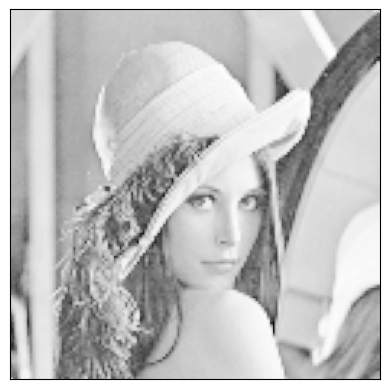

In [6]:
im_gray = cv2.imread("lena.bmp", cv2.IMREAD_GRAYSCALE)
im_lut = cv2.LUT(im_gray, lut.log)
plt.imshow(im_lut)
plt.xticks([])
plt.yticks([])
plt.gray()
plt.show()


Aby lepiej zobaczyć w jaki sposób działają różne przekodowania LUT, skonstruujemy funkcję, która jako argumenty pobierać będzie obrazek oryginalny oraz tablicę przekodowania, a następnie na wspólnym rysunku będzie wyświetlać: funkcję, obraz wejściowy oraz wynik przekodowania.

Przypomnienie składni tworzenia funkcji w pythonie:
```{python}
  def nazwa_funkcji(para, metry):
  	# cialo funkcji
```

  - Stwórz nową funkcję i nazwij ją LUT.
  - Funkcja powinna przyjmować dwa parametry: obraz oraz tablicę przekodowania.
  - W ciele funkcji wykonaj przekodowanie LUT, podobnie jak wcześniej w przykładzie.
  - Funkcja powinna wyświetlić wykres składający się z 3 umieszczonych obok siebie pól: wykres przekodowania, obraz oryginalny oraz obraz przekształcony.
    Każdy z wykresów powinien być podpisany.
    _(W razie problemów można przypomnieć sobie te zagadnienia z laboratorium wprowadzającego)_
  - Jeśli wykres przekodowania jest zbyt rozciągnięty, można go wyrównać, np. `ax2.set_aspect('equal')`.

In [7]:
# def LUT(src_img, lutt):
#
#     im_gray = cv2.imread(src_img, cv2.IMREAD_GRAYSCALE)
#     plt.imshow(im_gray)
#     plt.xticks([])
#     plt.yticks([])
#     plt.gray()
#     plt.show()
#
#     plt.plot(lutt)
#     plt.show()
#
#
#     im_lut = cv2.LUT(im_gray, lutt)
#     plt.imshow(im_lut)
#     plt.xticks([])
#     plt.yticks([])
#     plt.gray()
#     plt.show()
#
# LUT("lena.bmp", lut.log)

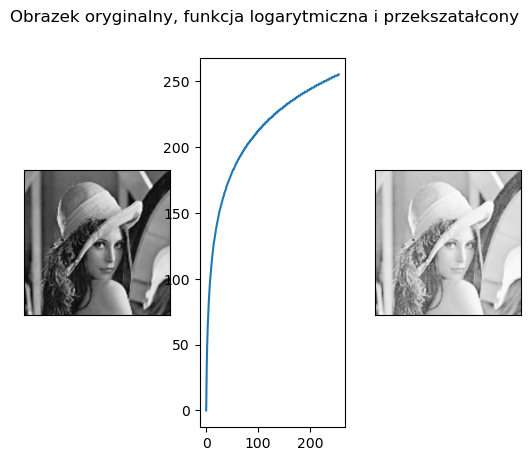

In [8]:
def LUT(src_img, lutt, name):
    im_gray = cv2.imread(src_img, cv2.IMREAD_GRAYSCALE)

    plt.subplot(1, 3, 1)  # Pierwszy wykres liniowy
    plt.imshow(im_gray)
    plt.xticks([])
    plt.yticks([])
    plt.gray()

    plt.subplot(1, 3, 2) # Drugi subplot na obrazek
    plt.plot(lutt)

    plt.subplot(1, 3, 3)
    im_lut = cv2.LUT(im_gray, lutt)
    plt.imshow(im_lut)
    plt.xticks([])
    plt.yticks([])
    plt.gray()


    plt.suptitle(f'Obrazek oryginalny, funkcja {name} i przekszatałcony')
    plt.show()

    # Ustawienie tytułów i etykiet osi






LUT("lena.bmp", lut.log, "logarytmiczna")

Wywołaj przygotowaną funkcję dla każdego z przekształceń.
W wyniku powinno powstać 7 wykresów.

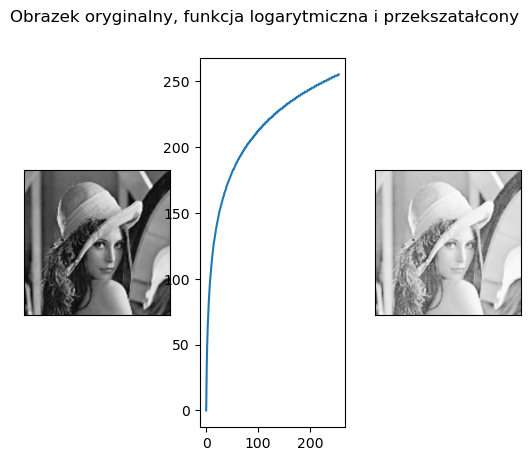

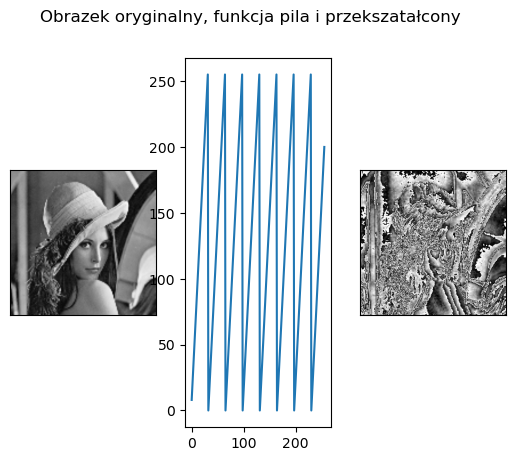

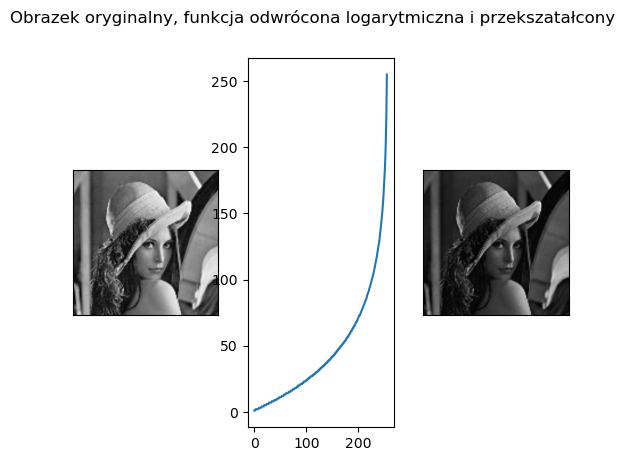

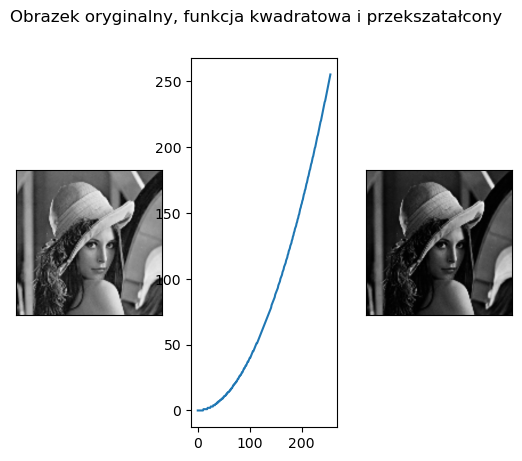

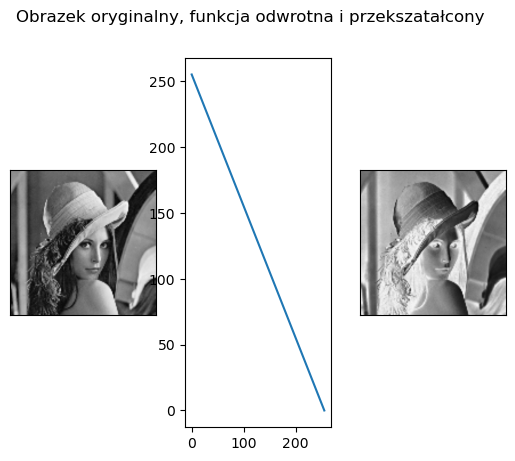

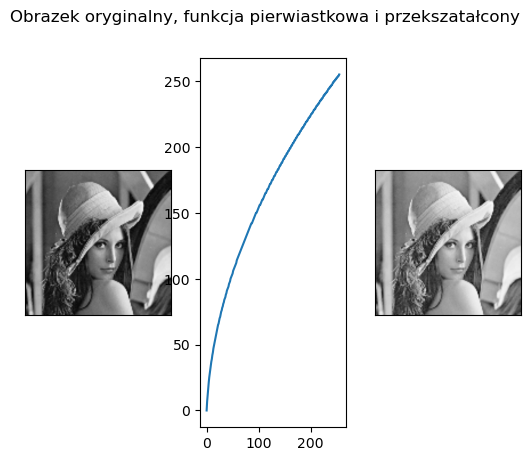

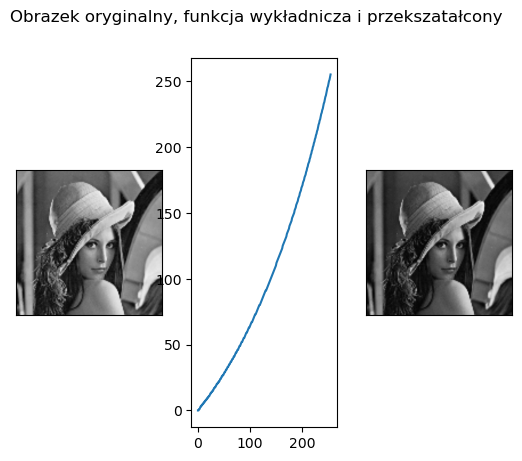

In [9]:
LUT('lena.bmp', lut.log, "logarytmiczna")
LUT('lena.bmp', lut.pila, "pila")
LUT('lena.bmp', lut.odwlog, "odwrócona logarytmiczna")
LUT('lena.bmp', lut.kwadratowa, "kwadratowa")
LUT('lena.bmp', lut.odwrotna, "odwrotna")
LUT('lena.bmp', lut.pierwiastkowa, "pierwiastkowa")
LUT('lena.bmp', lut.wykladnicza, "wykładnicza")

## Operacja arytmetyczne

### Dodawanie

Wczytaj dwa obrazy _lena.bmp_ i _jet.bmp_ i wyświetl je.

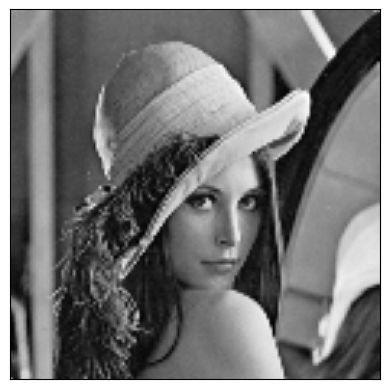

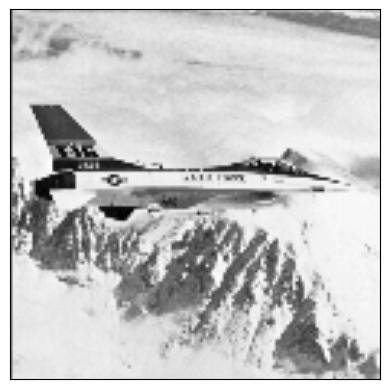

In [10]:
im_gray = cv2.imread("lena.bmp", cv2.IMREAD_GRAYSCALE)
plt.imshow(im_gray)
plt.xticks([])
plt.yticks([])
plt.gray()
plt.show()

im_gray = cv2.imread("jet.bmp", cv2.IMREAD_GRAYSCALE)
plt.imshow(im_gray)
plt.xticks([])
plt.yticks([])
plt.gray()
plt.show()

Dodaj obrazy _lena_ i _jet_, wykorzystaj funkcję `cv2.add`.
Uzyskany wynik wyświetl.

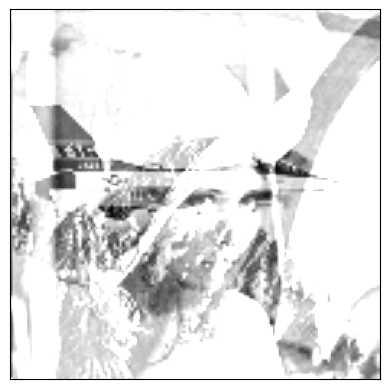

In [11]:
im_gray_1 = cv2.imread("lena.bmp", cv2.IMREAD_GRAYSCALE)
im_gray_2 = cv2.imread("jet.bmp", cv2.IMREAD_GRAYSCALE)

im_result = cv2.add(im_gray_1, im_gray_2)

plt.imshow(im_result)
plt.xticks([])
plt.yticks([])
plt.gray()
plt.show()

Czy wynik sumowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Spróbuj wykonać dodawanie ponownie wykorzystując typ uint16 (`jet.astype('uint16')`) dla arguemntów dodawania.
Wynikowy obraz należy przeskalować do zakresu 0-255, zamienić na typ uint8 i wyświetlić.
**Uwaga: operacja ta jest użyteczna w przypadku, gdy dane do wyświetlenia wykraczają poza zakres 0-255, w przeciwnym przypadku jej wykorzystanie może zniekształcić wyniki.**

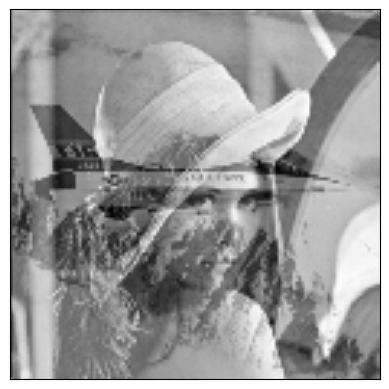

In [12]:
im_gray_1 = cv2.imread("lena.bmp", cv2.IMREAD_GRAYSCALE)
im_gray_2 = cv2.imread("jet.bmp", cv2.IMREAD_GRAYSCALE)

im_result = cv2.add(im_gray_1.astype('uint16'), im_gray_2.astype('uint16'))


if np.amax(im_result) > 255:
    max_num = np.amax(im_result)
    im_result = np.array([[int(i/max_num*256)-1 for i in j] for j in im_result])

plt.imshow(im_result.astype('uint8'))
plt.xticks([])
plt.yticks([])
plt.gray()
plt.show()

### Kombinacja liniowa

Do wykonywania operacji kombinacji liniowej służy funkcja `cv2.addWeighted`.
Zapoznaj się z dokumentacją tej funkcji i przetestuj kilka kombinacji liniowych obrazów _lena_ i _jet_.
Wyświetl wynik dowolnej z nich.

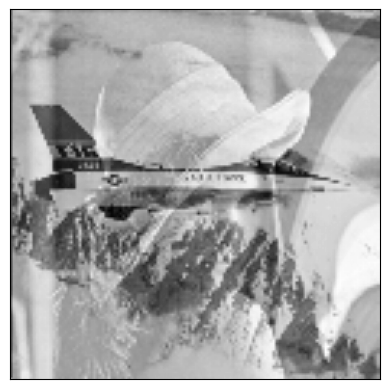

In [13]:
im_gray_1 = cv2.imread("lena.bmp", cv2.IMREAD_GRAYSCALE)
im_gray_2 = cv2.imread("jet.bmp", cv2.IMREAD_GRAYSCALE)

im_result = cv2.addWeighted(im_gray_1.astype('uint16'),0.4567, im_gray_2.astype('uint16'), 0.983, 0.123)


if np.amax(im_result) > 255:
    max_num = np.amax(im_result)
    im_result = np.array([[int(i/max_num*256)-1 for i in j] for j in im_result])

plt.imshow(im_result.astype('uint8'))
plt.xticks([])
plt.yticks([])
plt.gray()
plt.show()

### Odejmowanie

Wykorzystując funkcję `cv2.subtract` odejmij obrazy _lena_ i _jet_.

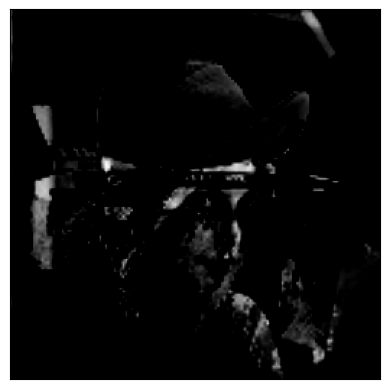

In [14]:
im_gray_1 = cv2.imread("lena.bmp", cv2.IMREAD_GRAYSCALE)
im_gray_2 = cv2.imread("jet.bmp", cv2.IMREAD_GRAYSCALE)

im_result = cv2.subtract(im_gray_1.astype('uint16'), im_gray_2.astype('uint16'))


if np.amax(im_result) > 255:
    max_num = np.amax(im_result)
    im_result = np.array([[int(i/max_num*256)-1 for i in j] for j in im_result])

plt.imshow(im_result.astype('uint8'))
plt.xticks([])
plt.yticks([])
plt.gray()
plt.show()

Czy wynik odejmowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Często zamiast zwykłego odejmowania wykorzystuje się operację wartość bezwzględna z różnicy (pozwala to między innymi uniknąć pokazanych powyżej problemów).
Zamień typ argumentów _lena_ i _jet_ z uint8 na **int16**, odejmij je od siebie, a następnie wykorzystując funkcję `np.abs` wykonaj operację wartość bezwzględna z różnicy.
Wyświetl ten obraz.
Zastanów się, dlaczego ta zmiana poprawia wynik odejmowania?

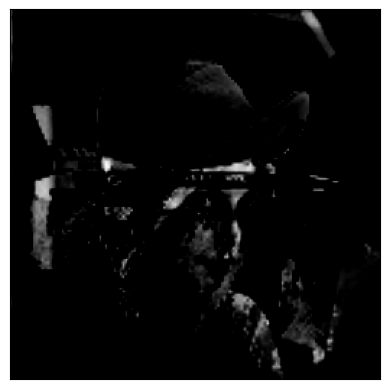

In [18]:
im_gray_1 = cv2.imread("lena.bmp", cv2.IMREAD_GRAYSCALE)
im_gray_2 = cv2.imread("jet.bmp", cv2.IMREAD_GRAYSCALE)

im_result = cv2.subtract(im_gray_1.astype('uint16'), im_gray_2.astype('uint16'))

#
# if np.amax(im_result) > 255:
#     max_num = np.amax(im_result)
#     im_result = np.array([[int(i/max_num*256)-1 for i in j] for j in im_result])

im_result = np.array([[np.abs(i) for i in j] for j in im_result])

plt.imshow(im_result.astype('uint8'))
plt.xticks([])
plt.yticks([])
plt.gray()
plt.show()

### Mnożenie

Mnożenie dwóch obrazów pozwala wykonać funkcja `cv2.multiply`.
Wykonaj mnożenie obrazów _lena_ i _jet_.
Czy wynik takiej operacji zawiera jakąś istotną informację?
Dlaczego?

Przed wykonaniem mnożenia zamień typ arguemntów na **float64**. Wynik mnożenia przeskaluj do zakresu 0-255, a następnie zrzutuj na typ **uint8**.

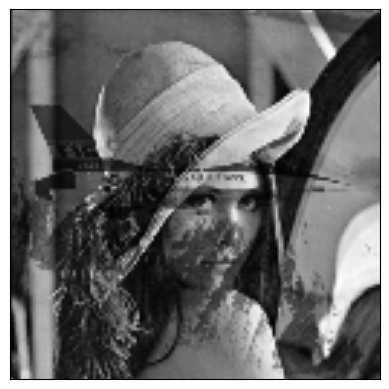

In [19]:
im_gray_1 = cv2.imread("lena.bmp", cv2.IMREAD_GRAYSCALE)
im_gray_2 = cv2.imread("jet.bmp", cv2.IMREAD_GRAYSCALE)

im_result = cv2.multiply(im_gray_1.astype('float64'), im_gray_2.astype('float64'))


if np.amax(im_result) > 255:
    max_num = np.amax(im_result)
    im_result = np.array([[int(i/max_num*256)-1 for i in j] for j in im_result])

plt.imshow(im_result.astype('uint8'))
plt.xticks([])
plt.yticks([])
plt.gray()
plt.show()

Mnożenie częściej wykorzystuje się jako:
  + mnożenie przez stałą $-$ co powoduje ogólne rozjaśnienie albo ściemnienie obrazu,
  + mnożenie przez maskę $-$ czyli obraz binarny.

Wczytaj maskę _kolo.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp).
Przemnóż wybrany obraz przez maskę i wyświetl wynik.
Mnożenie przez maskę można zrealizować za pomocą funkcji `cv2.multiply`, ale maskę należy należy najpierw przekształcić z zakresu 0-255 do 0-1, na przykład `(maska).astype('bool').astype('uint8')`.

In [20]:
fileName = 'kolo.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

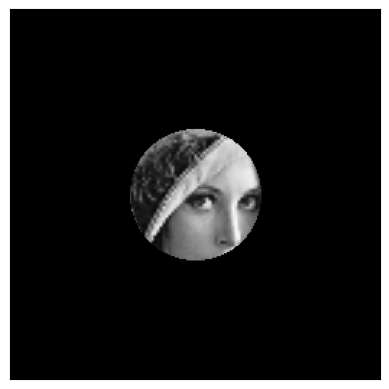

In [21]:
im_gray_1 = cv2.imread("lena.bmp", cv2.IMREAD_GRAYSCALE)
im_gray_2 = cv2.imread("kolo.bmp", cv2.IMREAD_GRAYSCALE).astype('bool').astype('uint8')

im_result = cv2.multiply(im_gray_1.astype('float64'), im_gray_2.astype('float64'))


if np.amax(im_result) > 255:
    max_num = np.amax(im_result)
    im_result = np.array([[int(i/max_num*256)-1 for i in j] for j in im_result])

plt.imshow(im_result.astype('uint8'))
plt.xticks([])
plt.yticks([])
plt.gray()
plt.show()

### Negatyw

Negatyw obrazu uzyskuje się za pomocą funkcji `cv2.bitwise_not(img)`
Negatyw obrazu można również uzyskać wykorzystując przekodowanie LUT.
Można w tym celu posłużyć się przygotowaną wcześniej tablicą `lut.odwrotna`.
Przetestuj działanie tych funkcji i wykonaj negatyw obrazu _lena_ dowolnym sposobem.

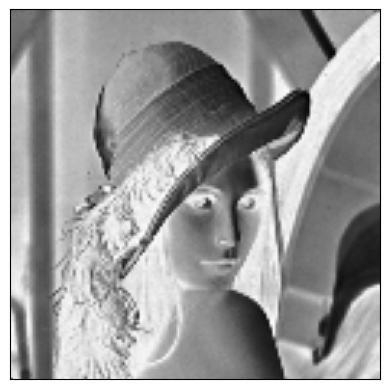

In [22]:
im_gray_1 = cv2.imread("lena.bmp", cv2.IMREAD_GRAYSCALE)
im_result = cv2.LUT(im_gray_1, lut.odwrotna)


plt.imshow(im_result.astype('uint8'))
plt.xticks([])
plt.yticks([])
plt.gray()
plt.show()

## Operacje logiczne

Na poszczególnych punktach obrazu (najczęściej binarnego $-$ czyli składającego się z dwóch kolorów: czarnego i białego) można wykonywać operacje logiczne: NOT, AND, OR, XOR itp.
Wczytaj dwa obrazy: _kolo.bmp_ i _kwadrat.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp), następnie wyświetl je.

In [60]:
fileName = 'kwadrat.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

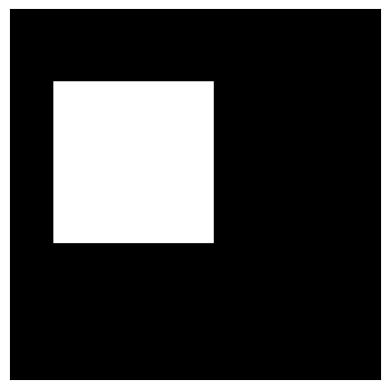

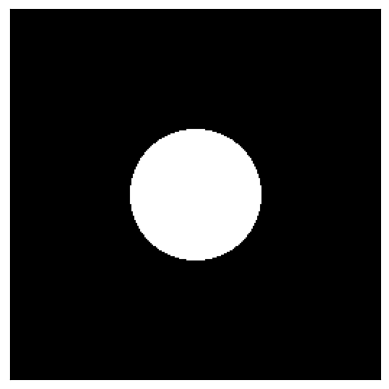

In [23]:
im_gray_1 = cv2.imread("kwadrat.bmp", cv2.IMREAD_GRAYSCALE)
im_gray_2 = cv2.imread("kolo.bmp", cv2.IMREAD_GRAYSCALE)


plt.imshow(im_gray_1)
plt.xticks([])
plt.yticks([])
plt.gray()
plt.show()

plt.imshow(im_gray_2)
plt.xticks([])
plt.yticks([])
plt.gray()
plt.show()

Na wczytanych obrazach wykonaj wybrane operacje logiczne: NOT (operator `~`), AND (`&`), OR (`|`), XOR (`^`).
Operator `~` jest jednoargumentowy, wszystkie pozostałe są dwuargumentowe.
Alternatywnym sposobem jest wykorzystanie funkcji z biblioteki opencv: `cv2.bitwise_not`, `cv2.bitwise_and`, `cv2.bitwise_or`, `cv2.bitwise_xor`.
Wyświetl rezultaty.

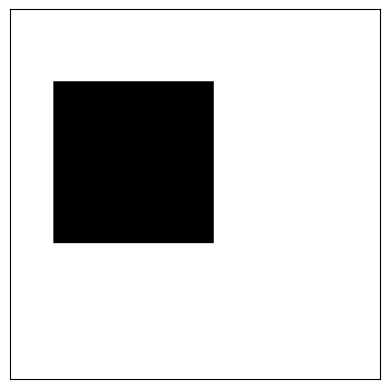

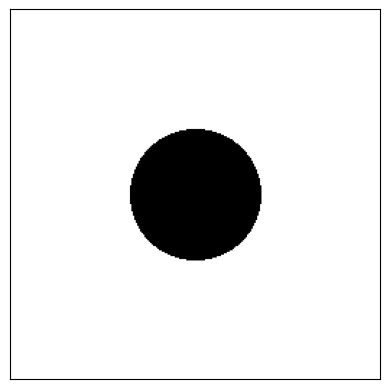

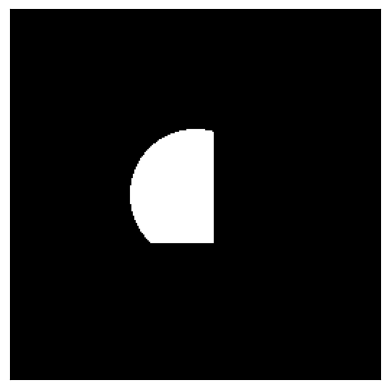

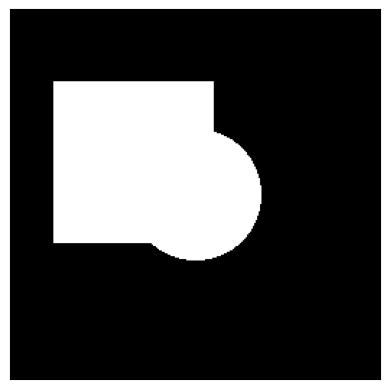

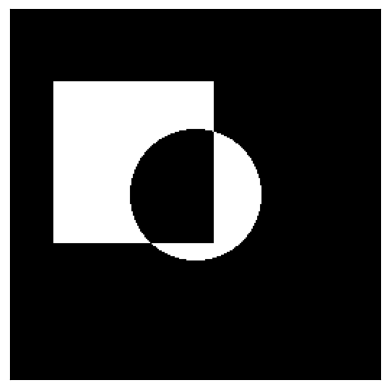

In [25]:
im_gray_1 = cv2.imread("kwadrat.bmp", cv2.IMREAD_GRAYSCALE)
im_gray_2 = cv2.imread("kolo.bmp", cv2.IMREAD_GRAYSCALE)


plt.imshow(~im_gray_1)
plt.xticks([])
plt.yticks([])
plt.gray()
plt.show()

plt.imshow(~im_gray_2)
plt.xticks([])
plt.yticks([])
plt.gray()
plt.show()

plt.imshow(im_gray_1 & im_gray_2)
plt.xticks([])
plt.yticks([])
plt.gray()
plt.show()

plt.imshow(im_gray_1 | im_gray_2)
plt.xticks([])
plt.yticks([])
plt.gray()
plt.show()

plt.imshow(im_gray_1 ^ im_gray_2)
plt.xticks([])
plt.yticks([])
plt.gray()
plt.show()